## CS 7641 Machine Learning
## Assignment 3 Unsupervised Learning and Dimensional Deduction
#### Experiment: Step 2 Dimensionality Reduction
#### Algorithms: PCA, ICA, Randomized Projections, Manifold Learning
#### Data      : Dropout

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from scipy.stats import kurtosis 

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA, PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import SparseRandomProjection


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Predict Students' Dropout and Academic Success

In [2]:
##
## Data Load
##

df = pd.read_csv("./data/dropout.csv", sep=";")

# Target 데이터 분석 및 제거
num_droupout = df.query('Target=="Dropout"')
num_enrolled = df.query('Target=="Enrolled"')
num_graduated = df.query('Target=="Graduate"')

# Enrolled 데이타 삭제 (pending)
df = df.drop(df[df['Target'] == "Enrolled"].index)

# pandas dataframe replace (from https://heytech.tistory.com/441)
df["Target"].replace({'Dropout':0, 'Graduate':1}, inplace = True)

X_raw = df.values[:,:-1]
y_raw = df.values[:,-1]

In [3]:
print('Kurtosis of normal distribution in y :', kurtosis(y_raw)) 

Kurtosis of normal distribution in y : -1.8021834418661549


## Linear Dimensionality Deduction (Primary Component Analysis: PCA)

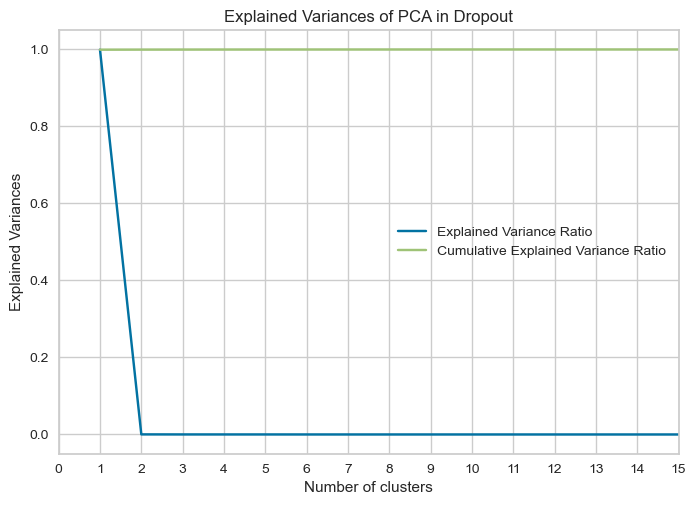

In [4]:
##
## Linear Dimensionality Reduction (PCA)
## sklearn.decomposition.PCA
## https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
##

pca = PCA().fit(X_raw)

line1, = plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
line2, = plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
line1.set_label("Explained Variance Ratio")
line2.set_label("Cumulative Explained Variance Ratio")
plt.legend()

plt.xlabel('Number of clusters')
plt.ylabel('Explained Variances')
plt.xlim(0, 15)
plt.xticks(range(16))
plt.title("Explained Variances of PCA in Dropout")
plt.show()

In [5]:
## 
## set the variables
## 

num_clusters = 2  # the number of clusters
name_dataset = "Dropout"  # the name of the dataset

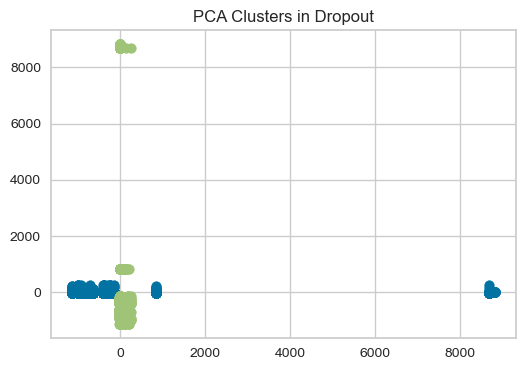

In [13]:
## 
## PCA Graph
## 

model = PCA(n_components = num_clusters)
X_raw_pca = model.fit_transform(X_raw)

plt.figure(figsize=(6, 4))
graph_title = "PCA Clusters in " + name_dataset
plt.title(graph_title)

for i in range(0, num_clusters):
    for j in range(0, num_clusters):
        if i == j:
            continue
        plt.scatter(X_raw_pca[:, i], X_raw_pca[:, j])

In [60]:
## 
## PCA Training Time, Shape Change, and Accuracy
## 

# Training Time
start_time = time.perf_counter()
model = PCA(n_components= num_clusters).fit(X_raw)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Shape Change
X_raw_pca = model.transform(X_raw)
print("Original Shape   : ", X_raw.shape)
print("Transformed Shape: ", X_raw_pca.shape)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_pca, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.08222124993335456
Original Shape   :  (3630, 36)
Transformed Shape:  (3630, 2)
Cross Validation Score: 0.6112350881357944
Test Accuracy: 0.6101928374655647


## Linear Dimensionality Deduction (Independent Component Analysis: ICA)

In [61]:
##
## Linear Dimensionality Reduction (ICA)
## sklearn.decomposition.FastICA
##

best_cluster = [0, 0]

for i in range(2, 15):
    model = FastICA(n_components=i, max_iter=10000, tol=0.1).fit(X_raw)
    X_raw_ica = model.fit_transform(X_raw)
    X_train, X_test, y_train, y_test = train_test_split(X_raw_ica, y_raw, test_size=0.2)
    classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
    cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
    if cross_score > best_cluster[1]:
        best_cluster = [i, cross_score]

print("The Number of Best Cluster: ", best_cluster[0])

The Number of Best Cluster:  14


In [62]:
## 
## set the variables
## 

num_clusters = 14  # the number of clusters
name_dataset = "Dropout"  # the name of the dataset

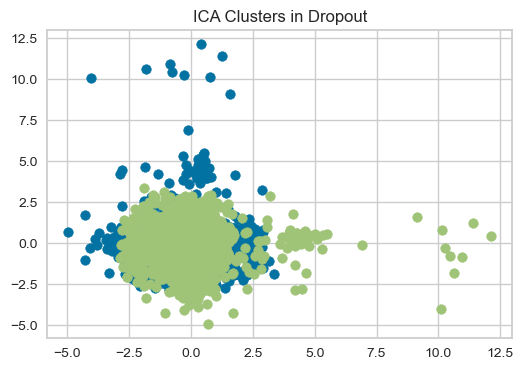

In [63]:
## 
## ICA Graph
## 

model = FastICA(n_components = num_clusters, max_iter=10000, tol=0.1)
X_raw_ica = model.fit_transform(X_raw)

plt.figure(figsize=(6, 4))
graph_title = "ICA Clusters in " + name_dataset
plt.title(graph_title)

for i in range(0, n_clusters):
    for j in range(0, n_clusters):
        if i == j:
            continue
        plt.scatter(X_raw_ica[:, i], X_raw_ica[:, j])

In [38]:
## 
## ICA Training Time, Shape Change, and Accuracy
## 

# Training Time
start_time = time.perf_counter()
model = FastICA(n_components= num_clusters).fit(X_raw)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Shape Change
X_raw_ica = model.transform(X_raw)
print("Original Shape   : ", X_raw.shape)
print("Transformed Shape: ", X_raw_ica.shape)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_pca, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.12823758402373642
Original Shape   :  (3630, 36)
Transformed Shape:  (3630, 14)
Cross Validation Score: 0.7806380200605376
Test Accuracy: 0.8112947658402204


## Linear Dimensionality Deduction (Randomized Projections)

In [64]:
##
## Linear Dimensionality Reduction (Randomized Projections)
## sklearn.random_projection.SparseRandomProjection
##

best_cluster = [0, 0]

for i in range(2, 15):
    model = SparseRandomProjection(n_components=i, random_state=0).fit(X_raw)
    X_raw_rp = model.fit_transform(X_raw)
    X_train, X_test, y_train, y_test = train_test_split(X_raw_rp, y_raw, test_size=0.2)
    classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
    cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
    if cross_score > best_cluster[1]:
        best_cluster = [i, cross_score]

print("The Number of Best Cluster: ", best_cluster[0])

The Number of Best Cluster:  9


In [65]:
## 
## set the variables
## 

num_clusters = 9  # the number of clusters
name_dataset = "Dropout"  # the name of the dataset

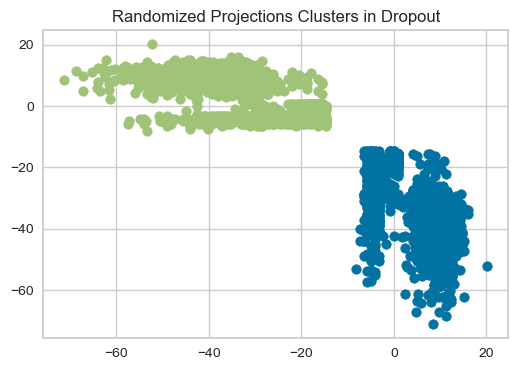

In [66]:
## 
## Randomized Projections Graph
## 

model = SparseRandomProjection(n_components=num_clusters, random_state=0)
X_raw_rp = model.fit_transform(X_raw)

plt.figure(figsize=(6, 4))
graph_title = "Randomized Projections Clusters in " + name_dataset
plt.title(graph_title)

for i in range(0, n_clusters):
    for j in range(0, n_clusters):
        if i == j:
            continue
        plt.scatter(X_raw_rp[:, i], X_raw_rp[:, j])

In [67]:
## 
## RO Training Time, Shape Change, and Accuracy
## 

# Training Time
start_time = time.perf_counter()
model = SparseRandomProjection(n_components=num_clusters, random_state=0).fit(X_raw)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Shape Change
X_raw_ica = model.transform(X_raw)
print("Original Shape   : ", X_raw.shape)
print("Transformed Shape: ", X_raw_ica.shape)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_pca, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.00295908295083791
Original Shape   :  (3630, 36)
Transformed Shape:  (3630, 9)
Cross Validation Score: 0.6246536886462104
Test Accuracy: 0.6088154269972452


## Non-linear Dimensionality Deduction (TruncatedSVD)

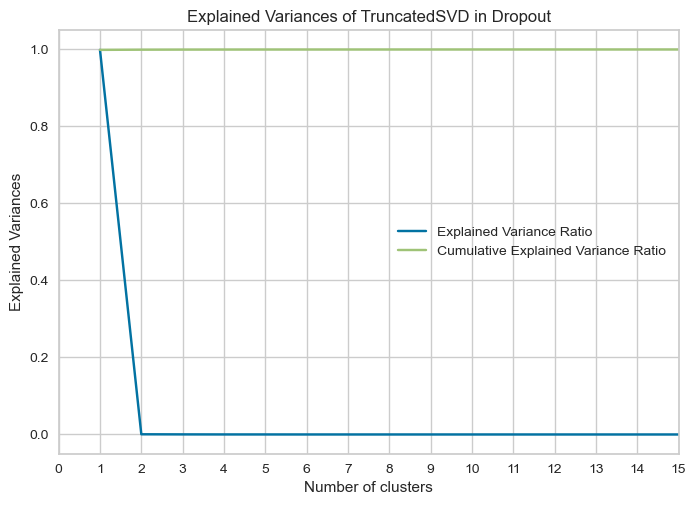

In [54]:
##
## Non-linear Dimensionality Reduction (TruncatedSVD)
## sklearn.decomposition.TruncatedSVD
## https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
##

num_component = X_raw.shape[1] -1
truncsvd = TruncatedSVD(n_components=num_component).fit(X_raw)

line1, = plt.plot(range(1, len(truncsvd.explained_variance_ratio_) + 1), truncsvd.explained_variance_ratio_)
line2, = plt.plot(range(1, len(truncsvd.explained_variance_ratio_) + 1), np.cumsum(truncsvd.explained_variance_ratio_))
line1.set_label("Explained Variance Ratio")
line2.set_label("Cumulative Explained Variance Ratio")
plt.legend()

plt.xlabel('Number of clusters')
plt.ylabel('Explained Variances')
plt.xlim(0, 15)
plt.xticks(range(16))
plt.title("Explained Variances of TruncatedSVD in Dropout")
plt.show()

In [53]:
## 
## set the variables
## 

num_clusters = 2  # the number of clusters
name_dataset = "Dropout"  # the name of the dataset

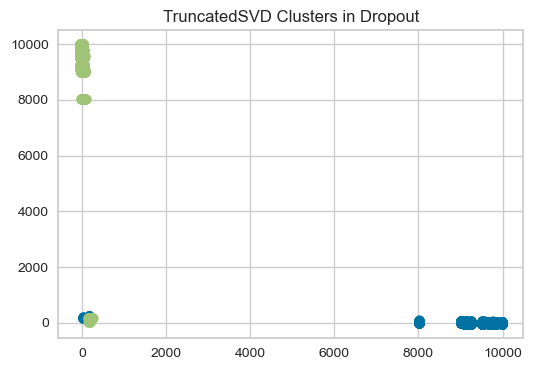

In [55]:
## 
## TruncatedSVD Graph
## 

model = TruncatedSVD(n_components=num_clusters)
X_raw_truncsvd = model.fit_transform(X_raw)

plt.figure(figsize=(6, 4))
graph_title = "TruncatedSVD Clusters in " + name_dataset
plt.title(graph_title)

for i in range(0, n_clusters):
    for j in range(0, n_clusters):
        if i == j:
            continue
        plt.scatter(X_raw_truncsvd[:, i], X_raw_truncsvd[:, j])


In [56]:
## 
## TruncatedSVD Training Time, Shape Change, and Accuracy
## 

# Training Time
start_time = time.perf_counter()
model = TruncatedSVD(n_components=num_clusters).fit(X_raw)
training_time = time.perf_counter() - start_time
print("Training Time: ", training_time)

# Shape Change
X_raw_ica = model.transform(X_raw)
print("Original Shape   : ", X_raw.shape)
print("Transformed Shape: ", X_raw_ica.shape)

# Accuracy
X_train, X_test, y_train, y_test = train_test_split(X_raw_pca, y_raw, test_size=0.2)

classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 3)
cross_score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print("Cross Validation Score: " + str(cross_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(accuracy_score))

Training Time:  0.09940325003117323
Original Shape   :  (3630, 36)
Transformed Shape:  (3630, 2)
Cross Validation Score: 0.7813389518665796
Test Accuracy: 0.7823691460055097
